In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar el classificador
from sklearn.model_selection import train_test_split # Importar funciones de particion
from sklearn import metrics #Importar las metricas de scikit-learn
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\Freddy\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
>>> from sklearn import tree

In [3]:
df = pd.read_csv("rating-peliculas.csv")

In [4]:
df.columns

Index(['pelicula', 'genero', 'ratings-rotten', 'ratings-audiencia',
       'costo-millones-usd', 'ano-estreno'],
      dtype='object')

In [5]:
df.describe()

,ratings-rotten,ratings-audiencia,costo-millones-usd,ano-estreno
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [6]:
y = df.genero
y.value_counts()


Comedy       172
Action       154
Drama        101
Horror        49
Thriller      36
Adventure     29
Romance       18
Name: genero, dtype: int64

In [7]:
len(y)

559

In [17]:
X = df.drop(['pelicula', 'genero', 'ratings-rotten', 'costo-millones-usd'], axis = 1)

In [18]:
X

,ratings-audiencia,ano-estreno
0,81,2009
1,44,2008
2,52,2009
3,84,2010
4,70,2009
5,63,2009
6,71,2008
7,57,2007
8,48,2011
9,93,2011


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [21]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [22]:
y_pred

array(['Drama', 'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Drama', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Action', 'Comedy', 'Comedy', 'Drama', 'Drama', 'Comedy',
       'Action', 'Comedy', 'Drama', 'Comedy', 'Comedy', 'Drama', 'Comedy',
       'Comedy', 'Comedy', 'Action', 'Action', 'Comedy', 'Comedy',
       'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Comedy', 'Drama', 'Action', 'Comedy', 'Comedy',
       'Comedy', 'Drama', 'Drama', 'Comedy'], dtype=object)

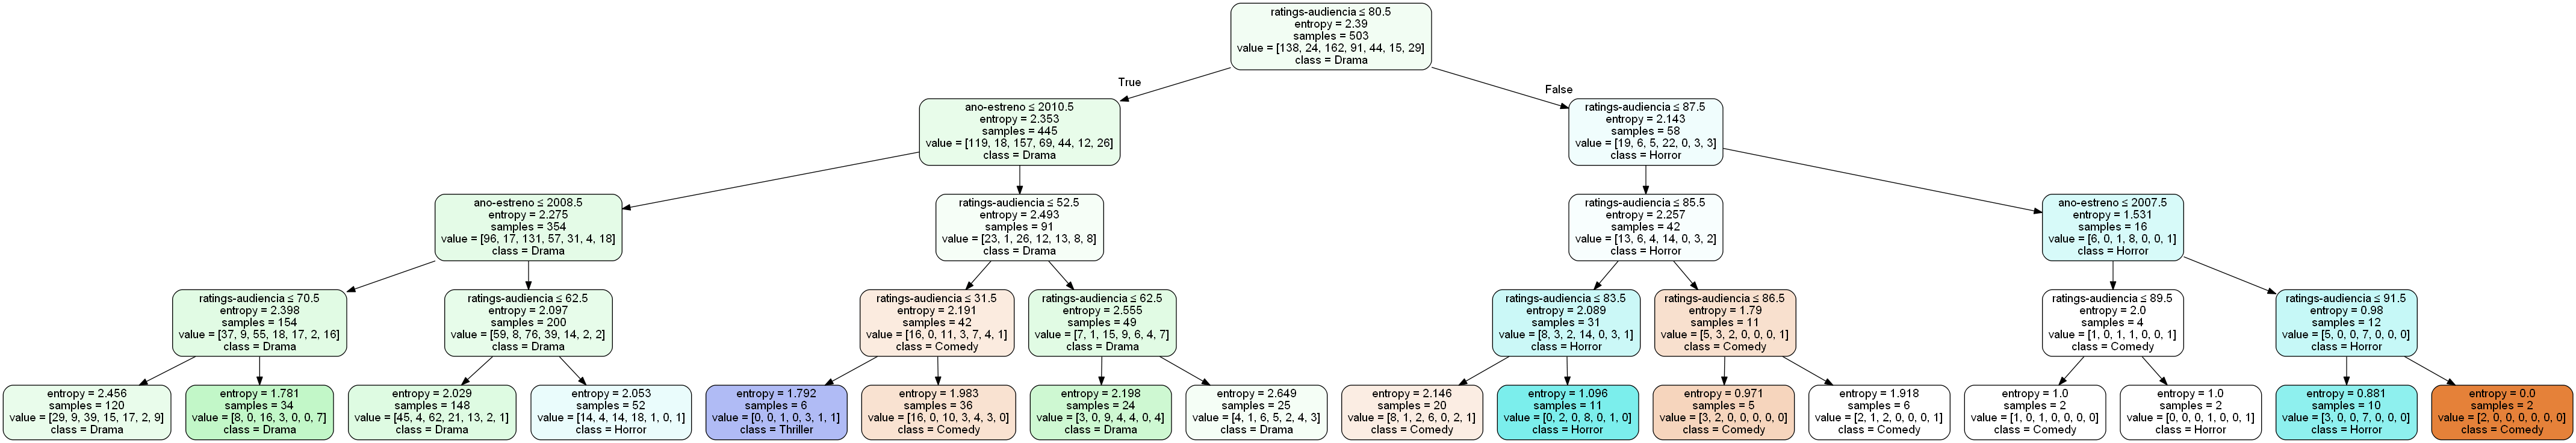

In [23]:
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data, filled = True, rounded = True,
               special_characters = True, feature_names = X.columns, 
                class_names = y.value_counts().index)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('peliculas.png')
Image(graph.create_png())

In [43]:
metrics.accuracy_score(y_test, y_pred)

0.375